# **BLIP** - BOOSTRAPED LANGUAGE IMAGE PRE-TRAINING FOR UNIFIED VISION-LANGUAGE UNDERSTANDING AND GENERATION

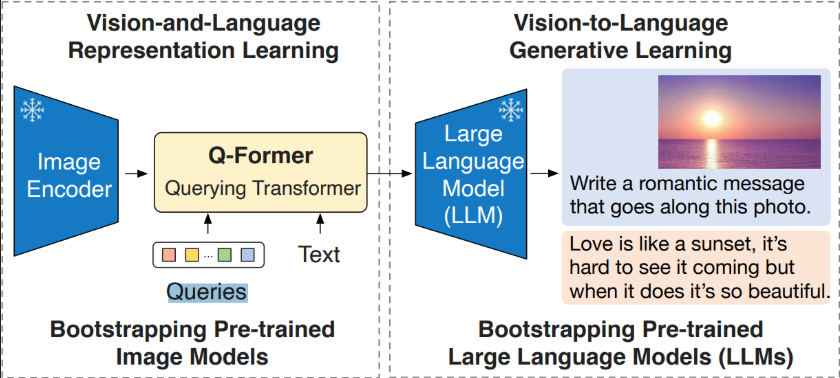

BLIP - is an architecture designed for vision-language tasks that integrates both visual and textual data to perform tasks like image captioning, visual question answering, Image-Text retrival and more.

The core idea behind BLIP is to utilize a multi-model fusion mechanisim that allows the model to effectively combine features from both image and text inputs, enabling better **understanding** and **generation** of content relevant to both modalities.

**BLIP** can be used

  * Visual Question Answering
  * Image-text Retrieval
  * Image Captioning


 * **Visual Question Answering (VQA)**: BLIP can be used for visual question answering by leveraging it's ability to understand both visual and textual inputs. In this task, the model is given an image along with a natural language question about the image. BLIP processes both inputs `jointly` and generates a relevant answer. Its pretraining on large-scale image-text pairs enables it to align visual features and textual concepts effectively, making it capable of reasoning about objects, actions, and context within the image to provide accurate answer.

 * **Image Captioning**: BLIP performs image captioning by generating descriptive textual captions for a given image. It combines visual understanding with natural language generation to produce coherent and contextual appropriate descriptions.  Thanks to its pretarining on a paired iamge-text data, BLIP can recognize various elements in an image and describe their relationship in human like language, making it effective for generating language captions that are both accurate and fluent.

  * **Image-Text Retrieval** In image-text retrieval, BLIP is used to find the most relevant image given a text query, or vise versa. it maps both images and textual descriptions into a shared embedding space where semantically similar pairs are close together. This allows for efficient matching between images and captions, During inference, BLIP can rank images based on their similarity to a given caption, or rank captions based on a given image, anabling poerful cross-modal search capabilities.


# **HOW DOES THE ARCHITECTURE BLIP ACTUALLY WORKS**

 * **Image Encoder** : BLIP uses Vision Transformer (ViT) as the image encoder. This encoder processes the input images through a series of transformer layers to generate a set of visual features. Each image is split into a fixed size pathes, linearly embedded, and then processed through the transformer network.

 * **Text Encoder** : The text encoder is alos based on the transformer architecture. It takes natural language inputs (such as question or caption), tokenizes and embedsit, and then processes it through layers to capture contextual relation ship between words and phrases.

 * **Cross-modal Attention** : This is the core componenet where information from both images and text is fused. After generating features from the image and text encoders, BLIP applies cross-modal attention, allowing the model to align and relate specific parts of the image with relevant words or phrases. For instance, when answering a question about an image, the model can focus on areas of the image most relevant to the question.

 * **Fusion Layers**: After Cross modal-attention, BLIP passes the combined features through additional transformer layers, known as fusion layers. This layers integrates the visual and textual innformation into a unified represenation, capturing deeper relationships between the two modalities.

 * **Pre-tarining and Fine-tuning**: BLIP is initially trained on large scale datasets using tasks such as masked language modeling, iamge-text matching, and contrastive learning. this tasks helps the model devlope a strong multi-modal understanding. Once pre-tranined, BLIP can be fine-tuned for specific applications like visual question answering or image captioning.

 * **Output Heads**: depending on the downstream task, different output heads are attached to the fuesed represenation. For example, a classification head is used for generating image captions or open-ended answers.


#**Model Archtecture**

Previous vision-language models faced several major challenges, with one of the biggest being how to obtain large volums of high-quality image-text pairs. One common approach was to use datasets with human-annotated captions, but this method was both time consuming and labor-intensive, making it difficult to scale. Alternatively, web scraping was used to gather image-text pairs from the internet. However, this method introduced noisy and often inaccurate captions that didn't reliably reflect image content, requiring siginifican human intervention or complex filtering mechanisim to clean the data. To address this, BLIP introduces a novel filtering mechanisim and a captioner module. The captioner generates synthetic captions for images, while the filter module evaluates both web-scraped and synthetic captions to select the most relevalent and accurate ones, siginificantly reducing noise during pretraining.
Another limitations is earlier models was the task-specific nature of Transformer architectures: encoder-based models typically excelled at understanding tasks like classification, while deoder based models were better suited for generation tasks like captioning. BLIP overcomes this by introducing a**multimodal mixture of encoder-decoder (MMED) architecture**, enabling a unified model capable of both understanding and generating language grounded in visual content. this dual capability allows BLIP to perform a wide range of tasks more effectively than previous single-purpose architectures.

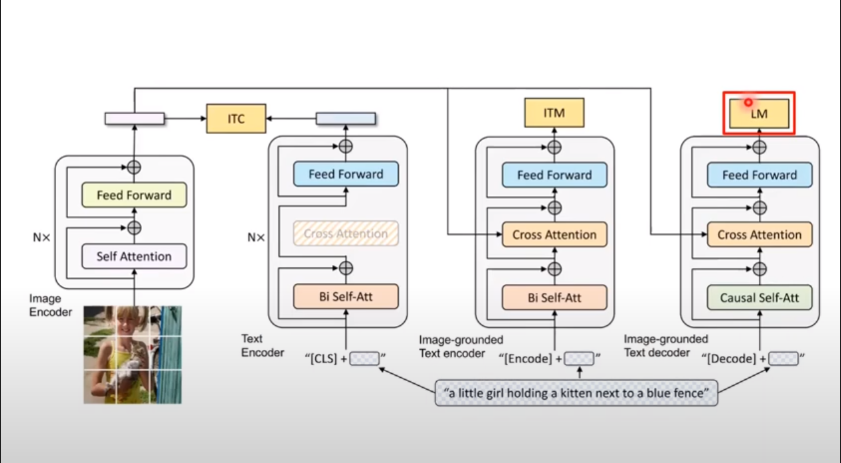



Figure :- Pre-training model architecture and objectives of BLIP (same parameters have the same color). The proposed multi-modal mixture of encoder-decoder, has three functionalities 1) Text Encoder (Unimodal encoder) is trained with an image-text contrastive (ITC) 2) Image-grounded text encoder uses additional cross attention layers to model vision-language interactions and is trained with an image-text matching (ITM) loss 3) image-ground text decoder replaces the bi-directional self-attention layers with causal self-attention layers, and shares the same cross-attention layers and feed forward networks as the encoder.



The first component of the BLIP model is the Vision Transformer (ViT), which follows the architecture introduced in the paper "An Image is Worth 16x16 Words". During the forward pass, each image is divided into fixed-size patches of 16×16 pixels. Each patch is then flattened and linearly embedded into a vector. These patch embeddings are stacked together, and a special [CLS] (class) token is prepended to the sequence, which is intended to capture the global representation of the entire image. Positional embeddings are added to preserve spatial information. This sequence is then passed through multiple layers of self-attention. In each self-attention layer, attention scores are computed using learnable query, key, and value matrices. The output is combined with the original embeddings via residual connections, normalized using layer normalization, and passed through a feed-forward network. This process is repeated across all transformer layers. The final output, particularly the embedding corresponding to the [CLS] token, is used as the global visual representation and is passed to downstream components of the BLIP model.

The next key component is the Text Encoder, which uses the architecture of a pre-trained BERT model. In each forward pass, the input text is tokenized and embedded. Similar to the vision encoder, a [CLS] token is prepended to the input sequence to serve as a summary representation of the entire sentence. Positional embeddings are added as well. Like ViT, BERT also uses self-attention layers, but these are bidirectional, meaning each token can attend to all other tokens in the sequence in both directions (left and right). This bidirectional attention allows the model to better capture contextual relationships among words, enhancing the quality of the token embeddings and the overall semantic representation.

Although the vision and text encoders share a similar transformer-based structure, they are specialized for their respective modalities: ViT handles visual input with spatial structure, while BERT processes sequential text with complex linguistic dependencies. Together, they form the foundation for BLIP's cross-modal capabilities.

**Unimodal Encoders and Image-Text Contrastive (ITC) Learning** : BLIP utilizes unimodal encoders to independently process images and text before performing any cross-modal fusion. The text encoder is based on the BERT architecture, pre-trained with the Masked Language Modeling (MLM) objective. A special [CLS] token is added at the beginning of the input sequence to summarize the entire sentence. The model uses bidirectional self-attention to capture contextual relationships between words, producing rich textual embeddings. The image encoder is a Vision Transformer (ViT) that splits the input image into fixed-size patches, embeds them, and prepends a [CLS] token to represent the global visual context. Both encoders output modality-specific representations.

A key learning objective in this stage is Image-Text Contrastive (ITC) learning, which aligns the embeddings from the two modalities in a shared feature space. Using ITC, the model is trained to bring matched image-text pairs (i.e., a caption and its corresponding image) closer together in the embedding space, while pushing apart mismatched pairs. This contrastive objective enables the model to learn strong semantic correspondences between images and text, forming the foundation for downstream tasks such as retrieval, captioning, and VQA.

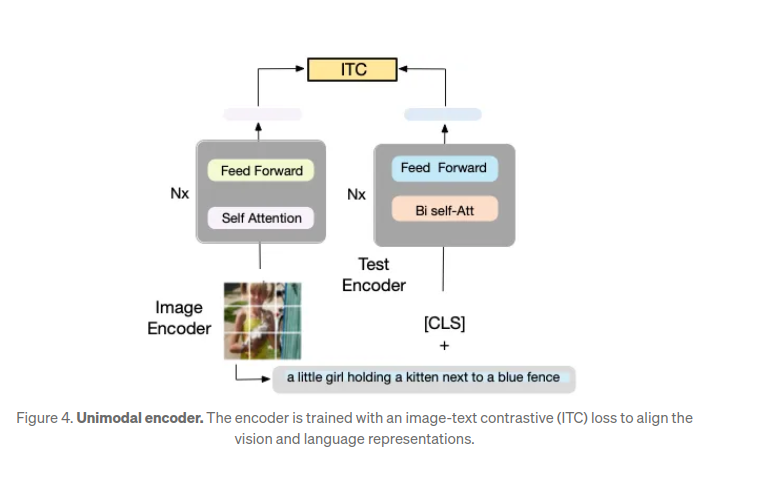

By multiplying the image matrix by the transpose of the text matrix a global feature space is computed where the diagonal side Matrix should represent interesection of each correct image X text pair, the cosine similarity in this diagonal should be maximized and the off diagonal elements should we have their similarities minimized.

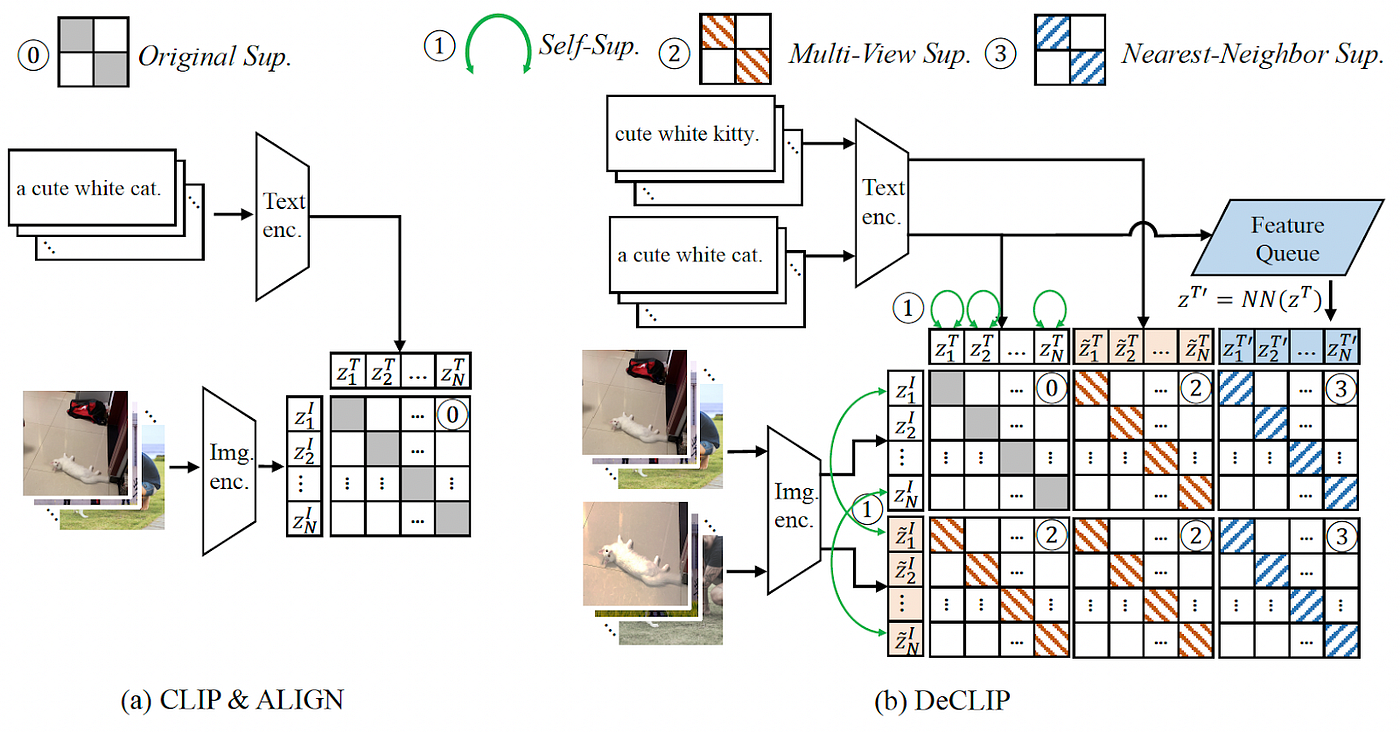




### **Image-Ground Text Encoder**


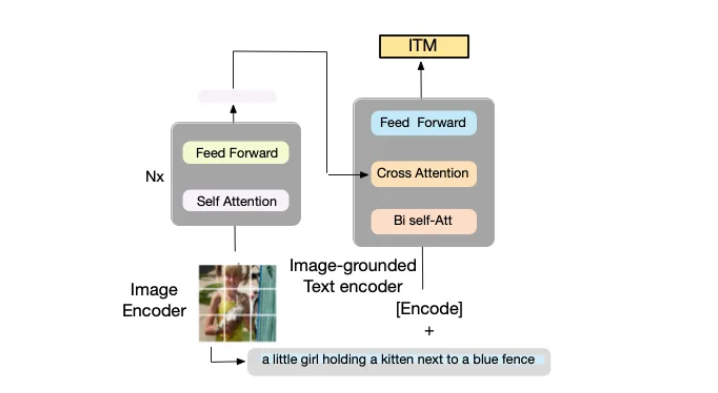

Image-grounded text encoder, The encoder uses additional cross-attention layers to model vision language interactions and trained with a image-text matching (ITM) loss to distinguish between positive and negative image-text pairs

The next component is the image-ground text encoder, this Transformer will later be used during fine-tuning as the filtering mechanism in the cap filter module. Similar to the previous text encoder, each word token is embedded and learnable. Additionally a learnable task specific token is prepended to the sequence. This token will be used as the output of the encoder to represent the multi-modal representation of both the text and image modalities. Again, this Transformer shares many of the same layers as the previous encoders, but notice the addition of the cross-attention layer, this layer takes the final query, and key matrices generated from Vision Transformer and calculates self attention scores using the value matrix of the image-text encoder. Essentially this injects visual information into attention scores of the image. The special tken is taken from the output and is used to calculate **image text match loss (ITM)**, which is a binary classification task(filter), during learning stage the model uses the prepended token as the Transformer head to predict whether each image-text pair is a positive, the pair is a match or a negative meaning the pair is not a match given the multi-modal feature represenation along with human annotated labels as an optimization strategy the model employs. A Hard negative mining strategy where the model identifies samples that got wrong  from the ITC loss and it re-introduces thosenegatives into the samples, this enables the model to distinguish between positive and negative examples better. During fine tuning this encoder will be used to find positive or matching image text pairs and filter out negative image text-pairs for both webcaptions and synthetic captions.     

### **Image Ground Text Decoder**

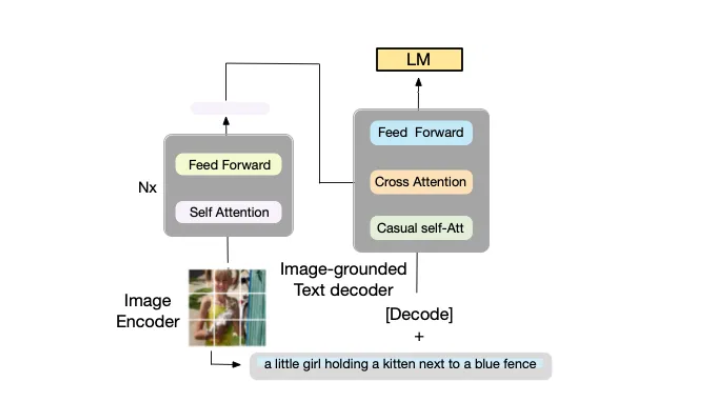

The image-ground text decoder, the decoder replaces the bi-directional self attention layers with causal self-attention layers, shares the same cross-attention layer, and feed-forward networks as the encoder. The decoder is trained with a language modeling (LM) loss to generate captions given images.

The final element of the model is the image ground text decoder, this will be used as autoregressive synthetic captioner in the cab filter module. The image-grounded text decoder employs Language Modeling Loss (LM). It activates the image grounded text decoder with the aim of generating textual descriptions given an image. The LM loss is trained to maximize the likelihood of the text in autoregressive manner. This Mask language modeling loss has already shown significant results in different models such as visual and language pre-training, to generate coherent captions.  

The output of the image ground encoder is used as the language modeling loss during training,the language modeling loss calculates the next token in a sequence using softmax, given an image and previous tokens in the sequence to decrease the certainity of the prediction.

Transformers are used to generate image captions. These synthetic captions often turn out to be more accurate than image texts obtained from the internet."



# SECTION 1: INSTALLATION AND IMPORTS

Before diving into deploying a multimodal model like **BLIP (Bootstrapping Language-Image Pretraining)**, it’s essential to set up a robust development environment.

we begin by installing the necessary Python packages including Hugging Face’s `transformers` and `datasets` libraries (with PyTorch support), as well as `gradio` for building interactive web interfaces. Once the dependencies are in place, the script imports a range of libraries to handle various tasks: `PyTorch` for deep learning, `PIL` and `matplotlib` for image processing and visualization, and `tqdm` for progress tracking.

we also bring in key components from the `transformers` library such as `BlipProcessor`, `BlipConfig`, and `BlipForQuestionAnswering`, which are critical for using BLIP in visual question answering (VQA) tasks. Tools like `GradScaler` and `autocast` are included to support mixed-precision training, which can significantly improve performance on modern GPUs. Finally, `Gradio` is imported for building a simple and shareable user interface.


In [1]:
!pip install transformers[torch] datasets -q gradio

import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from datasets import load_dataset
from torch.utils.data import Dataset, DataLoader
from transformers import BlipConfig, BlipProcessor, BlipForQuestionAnswering
from torch.optim import AdamW
# Import for mixed-precision training
from torch.cuda.amp import GradScaler, autocast
from tqdm.auto import tqdm
from IPython.display import display
import gradio as gr
import os

print("Libraries imported successfully!")

Libraries imported successfully!


# SECTION 2: CONFIGURATION

In this section, we define a centrilized `config` class to manage all the key hyperparameters and settings used throughout the BLIP fine-tuning pipeline. This includes specifiying the pre-trained BLIP model to use (`Salesforce/blip-vqa-base`), the dataset for visual question answering (`path-vqa`), and paths for saving outputs. we also defines training-specific parameters like the `number of epochs`, `batch size`, `learning rate`, and `gradient accumulation steps`, which together determine the effective batch size used during training. Additionally we specifiy input processing dimentions such as the maximum token length for text and image resolution. Ceneteralizing these values in a single config class makes the code more modular, maintainable, and easire to tweak for experimentation.

In [2]:
class Config:
    """
    Configuration class for all hyperparameters and settings.
    """
    MODEL_NAME = "Salesforce/blip-vqa-base"
    DATASET_NAME = "flaviagiammarino/path-vqa"
    OUTPUT_DIR = "blip_vqa_finetuned"

    TRAIN_SAMPLES = 2000
    VAL_SAMPLES = 500

    EPOCHS = 3
    BATCH_SIZE = 2
    GRADIENT_ACCUMULATION_STEPS = 16
    LEARNING_RATE = 5e-5

    MAX_TEXT_LENGTH = 32
    IMAGE_SIZE = 224

# Instantiate the config
config = Config()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
print(f"Effective batch size: {config.BATCH_SIZE * config.GRADIENT_ACCUMULATION_STEPS}")

Using device: cuda
Effective batch size: 32


# SECTION 3: DATA LOADING AND PREPARATION

In this step, we load the full VQA `dataset` directly from the Hugging Face Hub using the datasets library. For this example, we’re using the `path-vqa` dataset, which contains image-question-answer pairs. To speed up experimentation and reduce resource usage (especially on Colab), we select smaller subsets from the training and validation splits — specifically, the first `2000 training samples` and `500 validation samples`, as defined in our config. This approach allows us to prototype quickly while preserving a realistic training setup.

In [3]:
# Load the full dataset from Hugging Face
dataset = load_dataset(config.DATASET_NAME)

# Create smaller subsets for training and validation for this example
train_data = dataset["train"].select(range(config.TRAIN_SAMPLES))
val_data = dataset["validation"].select(range(config.VAL_SAMPLES))

print(f"Training samples: {len(train_data)}")
print(f"Validation samples: {len(val_data)}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00007-f2d0e9ef9f022d(…):   0%|          | 0.00/42.8M [00:00<?, ?B/s]

data/train-00001-of-00007-47d8e0220bf6c9(…):   0%|          | 0.00/81.0M [00:00<?, ?B/s]

data/train-00002-of-00007-7fb5037c4c5da7(…):   0%|          | 0.00/104M [00:00<?, ?B/s]

data/train-00003-of-00007-74b9b7b81cc55f(…):   0%|          | 0.00/90.0M [00:00<?, ?B/s]

data/train-00004-of-00007-77eea90af4a55d(…):   0%|          | 0.00/46.1M [00:00<?, ?B/s]

data/train-00005-of-00007-5332ec423be520(…):   0%|          | 0.00/55.8M [00:00<?, ?B/s]

data/train-00006-of-00007-637a58c700b604(…):   0%|          | 0.00/57.3M [00:00<?, ?B/s]

data/validation-00000-of-00003-90a5518d2(…):   0%|          | 0.00/41.3M [00:00<?, ?B/s]

data/validation-00001-of-00003-cbfe947a3(…):   0%|          | 0.00/45.7M [00:00<?, ?B/s]

data/validation-00002-of-00003-9ec816895(…):   0%|          | 0.00/64.7M [00:00<?, ?B/s]

data/test-00000-of-00003-e9adadb4799f44d(…):   0%|          | 0.00/41.2M [00:00<?, ?B/s]

data/test-00001-of-00003-7ea98873fc91981(…):   0%|          | 0.00/45.3M [00:00<?, ?B/s]

data/test-00002-of-00003-162830843501982(…):   0%|          | 0.00/69.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/19654 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6259 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6719 [00:00<?, ? examples/s]

Training samples: 2000
Validation samples: 500


# SECTION 4: CUSTOM DATASET AND DATALOADER

To train BLIP on our VQA task, we define a custome PyTorch `Dataset` class called `VQADataset`. this handles preprocessing of both the `image` and the corresponding `question-answer` pair. For each sample, we extract the image (converted to RGB), the natural language question, and its answer. These are then processed using the `BlipProcessor`, which tokenizes the text and prepares both ipmage and text inputs in a format compatable with BLIP model. The answer is also tokenized separately and returned as labels for supervised learning.

The processor returns PyTorch tensors with a batch dimentions by default, so we use `.squeeze(0)` to remove this dimenstion. since the `DataLoader` will automatically re-add it during training. After defining the dataset, we initialize separate `DataLoader`'s for training and validation sets with the desired batch size and shuffling strategy. This setup ensures that each batch contains correctly formatted multimodal inputs, ready to be fed into the BLIP model for fine-tuning.

In [4]:
class VQADataset(Dataset):
    """
    Custom PyTorch Dataset for VQA.
    """
    def __init__(self, data, processor):
        self.data = data
        self.processor = processor

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get image, question, and answer
        item = self.data[idx]
        image = item['image'].convert("RGB")
        question = item['question']
        answer = item['answer']

        # Process text (question) and image
        encoding = self.processor(
            images=image,
            text=question,
            padding="max_length",
            truncation=True,
            max_length=config.MAX_TEXT_LENGTH,
            return_tensors="pt"
        )

        # Squeeze inputs to remove the batch dimension, DataLoader will re-add it
        encoding = {k: v.squeeze(0) for k, v in encoding.items()}

        labels = self.processor.tokenizer.encode(
            answer,
            max_length=config.MAX_TEXT_LENGTH,
            padding="max_length",
            truncation=True,
            return_tensors='pt'
        )[0]

        encoding["labels"] = labels
        return encoding

# Initialize the processor and datasets
processor = BlipProcessor.from_pretrained(config.MODEL_NAME)
train_dataset = VQADataset(data=train_data, processor=processor)
val_dataset = VQADataset(data=val_data, processor=processor)

train_dataloader = DataLoader(train_dataset, batch_size=config.BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=config.BATCH_SIZE, shuffle=False)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

# SECTION 5: MODEL TRAINING AND SAVING

with our data and cofiguration set up, we now load the pre-trained **BLIP model for Visual Question Answering (VQA)** using Hugging Face's `BLIPForQuestionAnswering`. The model is moved to appropriate device, and we initialize the optimizer (`AdamW`) with our chosen learning rate. To make training more memory-efficient and faster on modern GPUs, we also enable **mixed-precision training** using PyTorch's `autocast` and `GradScaler`.

the training loop runs for a configuration number of epochs. Each batch is passed through the model inside a `with autocast()` context to levarage mixed-precision, and **gradient acumulation** is used to stimulate a larger batch size without exhausting GPU memory. After every `GRADIENT_ACCUMULATION_STEPS`, we perform an optimizer step and reset the gradients. We track and report the average training and validation loss per epoch for monitoring progress.

Once training completes, we save both the **fine-tuned model** and its processor (which handles image and text preprocessing) to the specified output directory. These saved artifacts can later be used for inference or deployment via tools like Gradio..

In [5]:
# Load the model
model = BlipForQuestionAnswering.from_pretrained(config.MODEL_NAME).to(device)
optimizer = AdamW(model.parameters(), lr=config.LEARNING_RATE)
scaler = GradScaler()

# Training loop
for epoch in range(config.EPOCHS):
    print(f"--- Epoch: {epoch+1}/{config.EPOCHS} ---")

    model.train()
    train_loss = 0
    for i, batch in enumerate(tqdm(train_dataloader, desc="Training")):
        batch = {k: v.to(device) for k, v in batch.items()}

        with autocast():
            outputs = model(**batch)
            loss = outputs.loss
            loss = loss / config.GRADIENT_ACCUMULATION_STEPS

        scaler.scale(loss).backward()

        if (i + 1) % config.GRADIENT_ACCUMULATION_STEPS == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()

        train_loss += loss.item() * config.GRADIENT_ACCUMULATION_STEPS

    avg_train_loss = train_loss / len(train_dataloader)
    print(f"Average Training Loss: {avg_train_loss:.4f}")

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in tqdm(val_dataloader, desc="Validation"):
            batch = {k: v.to(device) for k, v in batch.items()}
            with autocast():
                outputs = model(**batch)
                val_loss += outputs.loss.item()

    avg_val_loss = val_loss / len(val_dataloader)
    print(f"Average Validation Loss: {avg_val_loss:.4f}")

# Save the fine-tuned model and processor
print("Saving fine-tuned model and processor...")
os.makedirs(config.OUTPUT_DIR, exist_ok=True)
model.save_pretrained(config.OUTPUT_DIR)
processor.save_pretrained(config.OUTPUT_DIR)
print(f"Model and processor saved to '{config.OUTPUT_DIR}'")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

--- Epoch: 1/3 ---


/tmp/ipython-input-301879760.py:4: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipython-input-301879760.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Average Training Loss: 6.1011


Validation:   0%|          | 0/250 [00:00<?, ?it/s]

/tmp/ipython-input-301879760.py:37: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Average Validation Loss: 2.5070
--- Epoch: 2/3 ---


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Average Training Loss: 0.7594


Validation:   0%|          | 0/250 [00:00<?, ?it/s]

Average Validation Loss: 0.6511
--- Epoch: 3/3 ---


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Average Training Loss: 0.2511


Validation:   0%|          | 0/250 [00:00<?, ?it/s]

Average Validation Loss: 0.6033
Saving fine-tuned model and processor...
Model and processor saved to 'blip_vqa_finetuned'


# SECTION 6: INFERENCE AND VISUALIZATION (Gradio UI)

Now that we’ve fine-tuned our BLIP model on the PathVQA dataset, it’s time to make it interactive! In this section, we first attempt to **load the fine-tuned model and processor** from the local output directory. If the local files aren't available (e.g., if you're running the notebook for the first time), the code gracefully falls back to loading the **pre-trained BLIP model from Hugging Face.**

We then define a simple `predict_vqa` function that takes an image and a question, processes them using the BLIP processor, and generates an answer using the model’s generation capabilities. The decoded answer is appended to a chat-style history, making the interaction feel more conversational.


To build the user interface, we use **Gradio’s** `Blocks` API to create a clean and user-friendly layout. Users can upload a medical image, ask a free-text question, and receive real-time answers from the model. The chatbot component stores the conversation history, while the interface also includes controls to clear inputs and reset the session. Finally, the app is launched with `share=True`, allowing you to generate a public link for sharing and testing  medical VQA model.

In [6]:
# Load the fine-tuned model and processor
try:
    processor = BlipProcessor.from_pretrained("./blip_vqa_finetuned")
    model = BlipForQuestionAnswering.from_pretrained("./blip_vqa_finetuned")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print("Model and processor loaded successfully from local directory.")
except Exception as e:
    print(f"Could not load local model: {e}")
    print("Loading pre-trained model from Hugging Face Hub instead.")
    processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
    model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

def predict_vqa(image, question, chat_history):
    """
    Processes the image and question and generates an answer.
    """
    if image is None or question is None:
        return "", chat_history

    # Process the image and question
    inputs = processor(
        images=image.convert("RGB"),
        text=question,
        return_tensors="pt"
    ).to(device)

    # Generate the answer
    with torch.no_grad():
        output_tokens = model.generate(**inputs, max_length=50)

    # Decode the answer and format the chat history
    answer = processor.decode(output_tokens[0], skip_special_tokens=True)
    chat_history.append((question, answer))
    return "", chat_history

# Gradio user interface
with gr.Blocks() as demo:
    gr.Markdown("# 👩‍⚕️ Medical VQA with Fine-Tuned BLIP")
    gr.Markdown("Upload a medical image and ask a question about it. This model has been fine-tuned on the PathVQA dataset.")

    with gr.Row():
        image_input = gr.Image(type="pil", label="Upload Medical Image")
        with gr.Column():
            chatbot = gr.Chatbot(label="Chat History", height=400)
            text_input = gr.Textbox(placeholder="Ask a question...", label="Question")

            with gr.Row():
                submit_button = gr.Button("Submit", variant="primary")
                clear_button = gr.Button("Clear")

    submit_button.click(
        fn=predict_vqa,
        inputs=[image_input, text_input, chatbot],
        outputs=[text_input, chatbot]
    )

    clear_button.click(
        fn=lambda: (None, None, []),
        inputs=[],
        outputs=[image_input, text_input, chatbot]
    )

# Launch the Gradio app
demo.launch(share=True)

Model and processor loaded successfully from local directory.


/tmp/ipython-input-16556901.py:47: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot = gr.Chatbot(label="Chat History", height=400)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0d3ba1f8de91bc09f5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
